In [1]:
import pandas as pd
from pandas_datareader import data as web # Package and modules for importing data.S
import datetime
 
#stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2016,1,1)
end = datetime.date.today()
 
# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
apple = web.DataReader("AAPL", "yahoo", start, end)
 
type(apple)     

pandas.core.frame.DataFrame

In [2]:
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,107.010002,107.029999,104.820000,105.260002,101.703697,40912300
2016-01-04,102.610001,105.370003,102.000000,105.349998,101.790649,67649400
2016-01-05,105.750000,105.849998,102.410004,102.709999,99.239845,55791000
2016-01-06,100.559998,102.370003,99.870003,100.699997,97.297760,68457400
2016-01-07,98.680000,100.129997,96.430000,96.449997,93.191338,81094400


Populating the interactive namespace from numpy and matplotlib


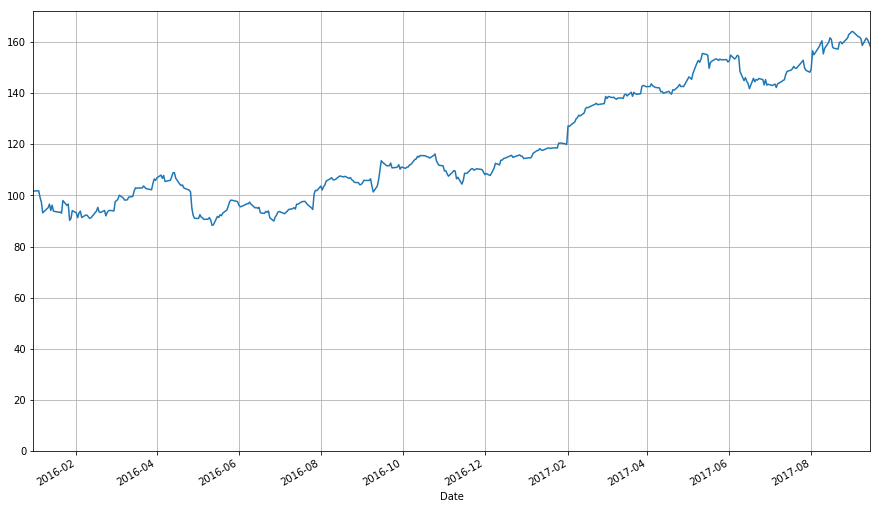

In [12]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
apple["Adj Close"].plot(grid = True) # Plot the adjusted closing price of AAPL

import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = (15, 9) 
apple["Adj Close"].hist()
plt.show()

In [4]:
microsoft = web.DataReader("MSFT", "yahoo", start, end)
google = web.DataReader("GOOG", "yahoo", start, end)
 
# Below I create a DataFrame consisting of the adjusted closing price of these stocks, first by making a list of these objects and using the join method
stocks = pd.DataFrame({"AAPL": apple["Adj Close"],
                      "MSFT": microsoft["Adj Close"],
                      "GOOG": google["Adj Close"]})
 
stocks.head()

,AAPL,GOOG,MSFT
Date,,,
2015-12-31,101.703697,758.880005,53.084164
2016-01-04,101.790649,741.840027,52.433533
2016-01-05,99.239845,742.580017,52.672737
2016-01-06,97.297760,743.619995,51.715916
2016-01-07,93.191338,726.390015,49.917099


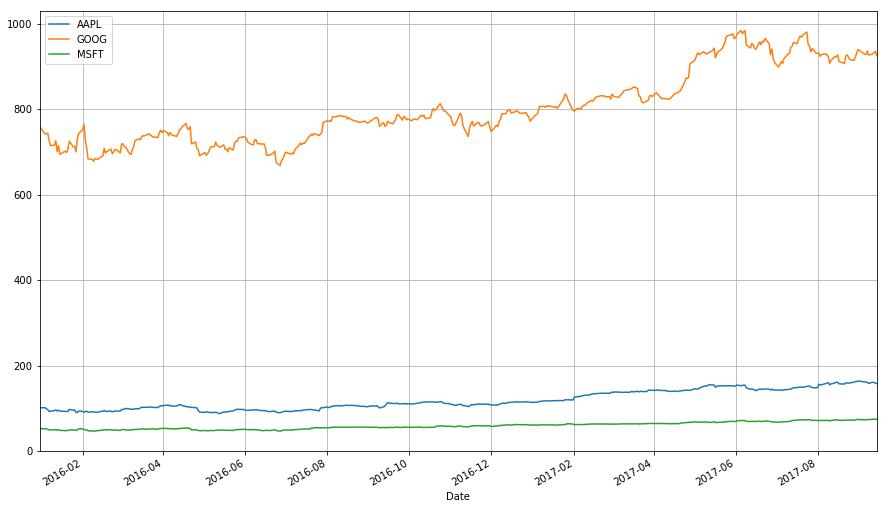

In [5]:
stocks.plot(grid = True)

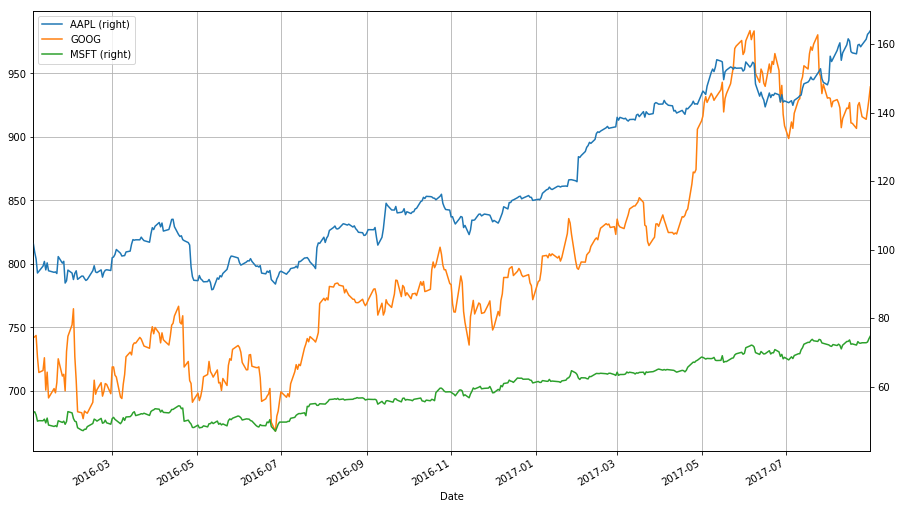

In [9]:
stocks.plot(secondary_y = ["AAPL", "MSFT"], grid = True)

In [13]:
# df.apply(arg) will apply the function arg to each column in df, and return a DataFrame with the result
# lambda x is an anonymous function accepting parameter x; in this case, x will be a pandas Series object
stock_return = stocks.apply(lambda x: x / x[0])
print(stocks.head())
stock_return.head()

                  AAPL        GOOG       MSFT
Date                                         
2015-12-31  101.703697  758.880005  53.084164
2016-01-04  101.790649  741.840027  52.433533
2016-01-05   99.239845  742.580017  52.672737
2016-01-06   97.297760  743.619995  51.715916
2016-01-07   93.191338  726.390015  49.917099


,AAPL,GOOG,MSFT
Date,,,
2015-12-31,1.000000,1.000000,1.000000
2016-01-04,1.000855,0.977546,0.987743
2016-01-05,0.975774,0.978521,0.992250
2016-01-06,0.956679,0.979891,0.974225
2016-01-07,0.916302,0.957187,0.940339


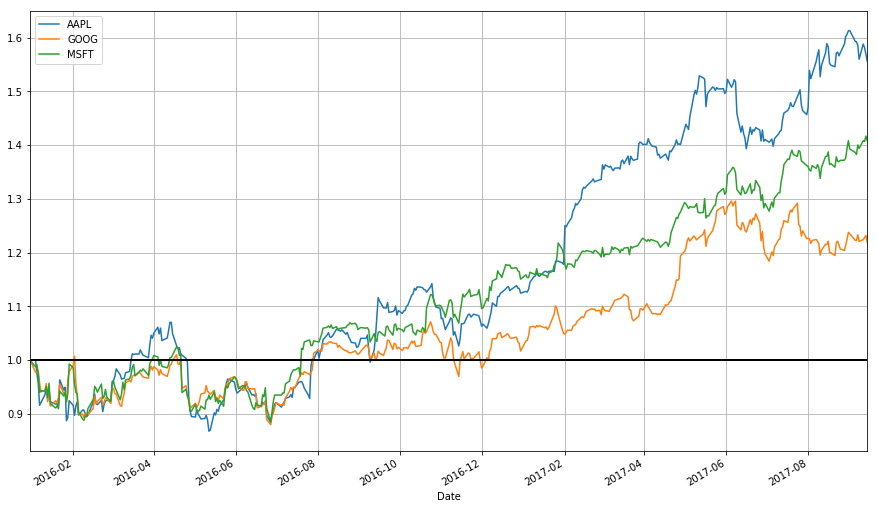

In [14]:
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

In [7]:
# Let's use NumPy's log function, though math's log function would work just as well
import numpy as np
 
stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

,AAPL,GOOG,MSFT
Date,,,
2015-12-31,NaN,NaN,NaN
2016-01-04,0.000855,-0.022710,-0.012332
2016-01-05,-0.025379,0.000997,0.004552
2016-01-06,-0.019764,0.001400,-0.018332
2016-01-07,-0.043121,-0.023443,-0.035402


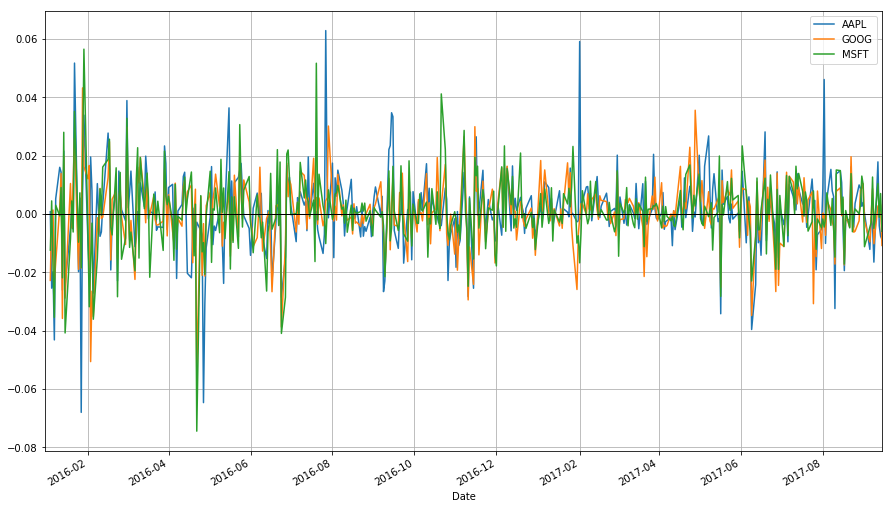

In [8]:
stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 1)